# Dimensionality Reduction


*Author: Christian Camilo Urcuqui López*

*GitHub: https://github.com/urcuqui/*

```
        
        |   | /  |   |  |  |  |  |  |  /  |   |  |  |  |      [0][1][0]   
        |       /    |  |  |  |  |       /    \   \_/  /      [1][1][1]   
        |      /     |  |  |  |  |      /      \  \_/ /       [1][1][1]   
        |  |\  \     |  '--'  |  |  |\  \       \    /        Data science    
        | _| `.__\   |________|  | _| `.__\      |___|                                
```

## MNIST Digits Database

### Packages

In [1]:
import numpy as np
import pandas as pd
import os, time
import pickle, gzip
 
""" visualization """
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

""" Data Prep and Model Evaluation"""
from sklearn import preprocessing as pp
from scipy.stats import pearsonr
from numpy.testing import assert_array_almost_equal
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import log_loss
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import confusion_matrix, classification_report

"""Algos"""
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb

In [2]:
color = sns.color_palette()

### Load the Data

In [3]:
f = gzip.open("../../Datasets/mnist_data/mnist.pkl.gz", "rb")
train_set, validation_set, test_set = pickle.load(f, encoding="latin1")
f.close()

In [4]:
X_train, y_train, = train_set[0], train_set[1]
X_validation, y_validation = validation_set[0], validation_set[1]
X_test, y_test = test_set[0], test_set[1]

In [5]:
print("Shape of X_train: %s" % str(X_train.shape))
print("Shape of y_train: %s" % str(y_train.shape))
print("Shape of X_validation: %s" % str(X_validation.shape))
print("Shape of y_validation: %s" % str(y_validation.shape))
print("Shape of X_test: %s" % str(X_test.shape))
print("Shape of y_test: %s" % str(y_test.shape))

Shape of X_train: (50000, 784)
Shape of y_train: (50000,)
Shape of X_validation: (10000, 784)
Shape of y_validation: (10000,)
Shape of X_test: (10000, 784)
Shape of y_test: (10000,)


### Explore the Data

In [6]:
train_index = range(0, len(X_train))
validation_index = range(len(X_train), len(X_train) + len(X_validation))
test_index = range(len(X_train)+len(X_validation), len(X_train) + len(X_validation)+len(X_test))

X_train = pd.DataFrame(data=X_train, index=train_index)
y_train = pd.Series(data=y_train, index=train_index)

X_validation = pd.DataFrame(data=X_validation,index=validation_index)
y_validation = pd.Series(data=y_validation,index=validation_index)

X_test = pd.DataFrame(data=X_test,index=test_index)
y_test = pd.Series(data=y_test,index=test_index)

In [7]:
X_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
count,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.0,50000.0,50000.0,50000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000739,0.000354,0.000204,0.000090,0.000071,0.000009,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.022778,0.015422,0.012079,0.007217,0.007181,0.001483,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.992188,0.992188,0.988281,0.988281,0.992188,0.242188,0.0,0.0,0.0,0.0


In [22]:
# labels
y_train.head()

0    5
1    0
2    4
3    1
4    9
dtype: int64

### Display the Images

In [33]:
def view_digits(example):
    label = y_train.loc[example]
    image = X_train.loc[example,:].values.reshape([28,28])
    plt.title("Example: %d Label: %d" %(example, label))
    plt.imshow(image, cmap = plt.get_cmap('gray'))
    plt.show()

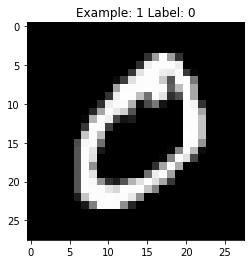

In [35]:
view_digits(1)

## Dimensionaly Reduction Algorithms

### Linear Projection

It involves linearly projecting data from a high-dimensional space to a low-dimensional space. This includes techniques such as principal component analysis, singular value decomposition, and random projection.

#### Principal Component Analysis

We have several versions of PCA, including standard PCA, incremental PCA, sparse PCA, and kernel PCA.

PC does it's dimensional reduction using the correlation among features. The idea is to combine highly correlated features and present this data with a smaller numner of linearly uncorrelated features. The newly derivided components are known as principal components. 

With these components, it is possible to reconstruct the original features - not exactly but generally close enough. 

*PCA is very sensitive to the relative ranges of the original featues. Generally que must scale the data to make sure the features are in the same relative range.* 

+ __*Standard PCA*__

In [16]:
# in our case we have 784 dimensions (knows as k), PCA will project the data onto a 
# smaller subspace of k dimensions (where k < d)
from sklearn.decomposition import PCA

n_components = 784
"""
whiten : bool, optional (default False)
When True (False by default) the components_ vectors are multiplied by the square
root of n_samples and then divided by the singular values to ensure uncorrelated 
outputs with unit component-wise variances.

Whitening will remove some information from the transformed signal 
(the relative variance scales of the components) but can sometime 
improve the predictive accuracy of the downstream estimators by 
making their data respect some hard-wired assumptions.
"""
whiten = False
random_state = 2018
pca = PCA(n_components = n_components, whiten=whiten, random_state= random_state)

In [17]:
# Apply PCA
X_train_PCA = pca.fit_transform(X_train)
X_train_PCA = pd.DataFrame(data=X_train_PCA, index=train_index)

Because we have not reduced the dimensionality at all (we’ve just transformed the data) the variance/information of the original data captured by the 784 principal components should be 100%

In [40]:
# Evaluate PCA
# # Percentage of Variance Captured by 784 principal components
print("Variance Explained by all 784 principal compoents: %s" %sum(pca.explained_variance_ratio_))

Variance Explained by all 784 principal compoents: 0.9999999999999993


Let´s see the importance of the first X principal components

In [41]:
# Percentage of Variance Captured by X principal components
importanceOfPrincipalComponents = pd.DataFrame(data= pca.explained_variance_ratio_)
importanceOfPrincipalComponents = importanceOfPrincipalComponents.T

In [45]:
importanceOfPrincipalComponents.shape

(1, 784)

In [42]:
print('Variance Captured by First 10 Principal Components: ',
      importanceOfPrincipalComponents.loc[:,0:9].sum(axis=1).values)

Variance Captured by First 10 Principal Components:  [0.48876238]


In [43]:
print('Variance Captured by First 20 Principal Components: ',
      importanceOfPrincipalComponents.loc[:,0:19].sum(axis=1).values)

Variance Captured by First 20 Principal Components:  [0.64398025]


In [44]:
print('Variance Captured by First 50 Principal Components: ',
      importanceOfPrincipalComponents.loc[:,0:49].sum(axis=1).values)

Variance Captured by First 50 Principal Components:  [0.8248609]


In [46]:
print('Variance Captured by First 100 Principal Components: ',
      importanceOfPrincipalComponents.loc[:,0:99].sum(axis=1).values)

Variance Captured by First 100 Principal Components:  [0.91465857]


In [47]:
print('Variance Captured by First 200 Principal Components: ',
      importanceOfPrincipalComponents.loc[:,0:199].sum(axis=1).values)

Variance Captured by First 200 Principal Components:  [0.96650076]


In [49]:
print('Variance Captured by First 300 Principal Components: ',
      importanceOfPrincipalComponents.loc[:,0:299].sum(axis=1).values)

Variance Captured by First 300 Principal Components:  [0.9862489]


The last results allow us to understand that that the first three houndred components are enough to catch the variance (99%); the information in the rest of the principal components is of negligible value.

In [67]:
importanceOfPrincipalComponents.loc[:,0:9]

,0,1,2,3,4,5,6,7,8,9
0,0.097444,0.070598,0.062161,0.053795,0.048581,0.043196,0.032776,0.028864,0.027688,0.023659


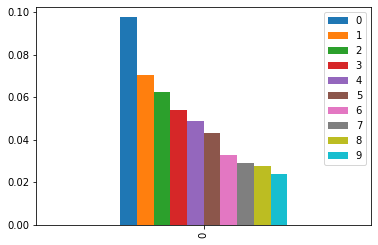

In [81]:
importanceOfPrincipalComponents.loc[:,0:9].plot(kind="bar")

In [8]:
def scatterPlot(xDF, yDF, algoName):
    tempDF = pd.DataFrame(data=xDF.loc[:, 0:1], index= xDF.index)
    tempDF = pd.concat((tempDF, yDF), axis=1, join="inner")
    tempDF.columns = ["First Vector", "Second Vector", "Label"]
    sns.lmplot(x="First Vector", y="Second Vector", hue="Label", data=tempDF, fit_reg=False)
    ax = plt.gca()
    ax.set_title("Separation of Observations Using " + algoName)

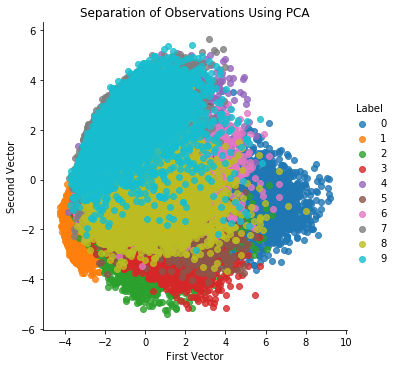

In [56]:
scatterPlot(X_train_PCA, y_train, "PCA")

Text(0.5, 1, 'Separation of Observations Using Original Feature Set')

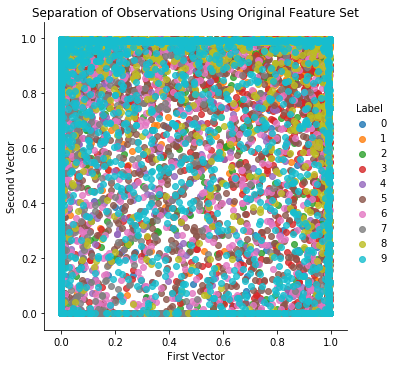

In [97]:
X_train_scatter = pd.DataFrame(data=X_train.loc[:,[350,406]], index=X_train.index)
X_train_scatter = pd.concat((X_train_scatter,y_train), axis=1, join="inner")
X_train_scatter.columns = ["First Vector", "Second Vector", "Label"]
sns.lmplot(x="First Vector", y="Second Vector", hue="Label", data=X_train_scatter, fit_reg=False)
ax = plt.gca()
ax.set_title("Separation of Observations Using Original Feature Set")

+ __*Incremental PCA*__

For a large datasets we can use PCA incrementally in small batches.

In [1]:
# incremental PCA
from sklearn.decomposition import IncrementalPCA

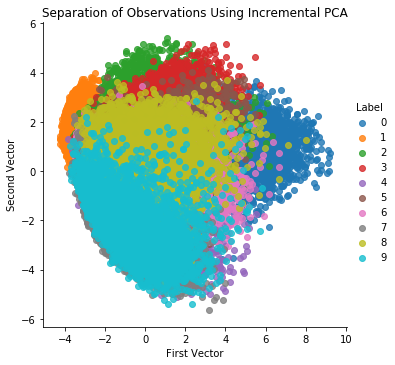

In [8]:
n_components = 784
batch_size = None
# If batch_size is None, then batch_size is inferred from the data and set to 5 * n_features
incrementalPCA = IncrementalPCA(n_components=n_components, batch_size = batch_size)
X_train_incrementalPCA = incrementalPCA.fit_transform(X_train)
X_train_incrementalPCA = pd.DataFrame(data=X_train_incrementalPCA, index=train_index)
X_validation_incrementalPCA = incrementalPCA.transform(X_validation)
X_validation_incrementalPCA = pd.DataFrame(data = X_validation_incrementalPCA, index=validation_index)

scatterPlot(X_train_incrementalPCA, y_train, "Incremental PCA")

+ __*Sparse PCA*__

The normal PCA algorithms searches for linear combinations in all the input variables, reducing the original feature space as densely as possible. In some problems we need to have some degree of sparsity may be preferred. Controlled by a hyperparameter called _alpha_ we can retain some degree of sparsity. This algorithm searches for linear combinations in just some of the input variables. This approach is slower than the normal PCA

C:\Users\rhaps\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\decomposition\sparse_pca.py:170: DeprecationWarning: normalize_components=False is a backward-compatible setting that implements a non-standard definition of sparse PCA. This compatibility mode will be removed in 0.22.
  DeprecationWarning)


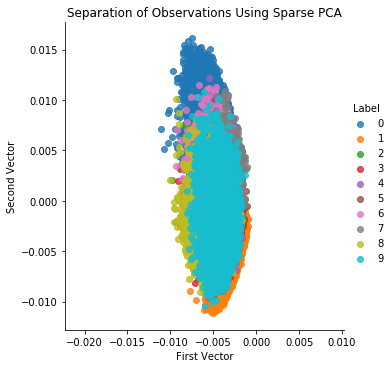

In [10]:
from sklearn.decomposition import SparsePCA

n_components = 100
alpha = 0.0001
random_state = 2018
n_jobs = -1

sparsePCA = SparsePCA(n_components=n_components, alpha=alpha, random_state=random_state, n_jobs=n_jobs)
sparsePCA.fit(X_train.loc[:10000,:])
X_train_sparsePCA = sparsePCA.transform(X_train)
X_train_sparsePCA = pd.DataFrame(data = X_train_sparsePCA, index=train_index)
X_validation_sparsePCA = sparsePCA.transform(X_validation)
X_validation_sparsePCA = pd.DataFrame(data=X_validation_sparsePCA, index=validation_index)

scatterPlot(X_train_sparsePCA, y_train, "Sparse PCA")

Look that the normal and space PCA generate principal components differently., and the separation of points is different too.

### Kernel PCA

Normal PCA, incremental PCA, and sparse PCA linearly project the original data into a lower dimensional space, but there is also a nonlinear form of PCA known as *kernel PCA* which performs nonlinear dimensionality reduction.

For this case we need to set the number of components we desire, the type of kernel, and the kernel coefficient, which is known as the gamma. The most popular kernel is the radial basis function kernel, more commonly knows as RBF kernel

https://en.wikipedia.org/wiki/Radial_basis_function_kernel

In [8]:
# Kernel PCA
from sklearn.decomposition import KernelPCA
n_components = 100
kernel = "rbf"
gamma = None
random_state = 2018
n_jobs = 1
kernelPCA = KernelPCA(n_components=n_components, kernel=kernel, 
                      gamma=gamma, n_jobs=n_jobs, random_state=random_state)
kernelPCA.fit(X_train.loc[:10000,:])

KernelPCA(alpha=1.0, coef0=1, copy_X=True, degree=3, eigen_solver='auto',
          fit_inverse_transform=False, gamma=None, kernel='rbf',
          kernel_params=None, max_iter=None, n_components=100, n_jobs=1,
          random_state=2018, remove_zero_eig=False, tol=0)

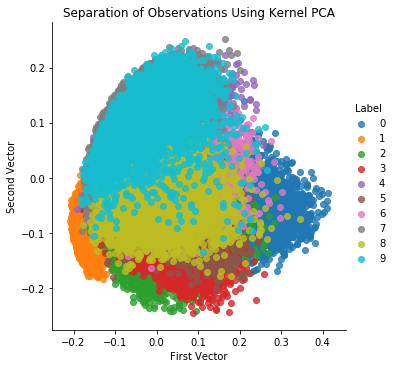

In [10]:
X_train_kernelPCA = kernelPCA.transform(X_train)
X_train_kernelPCA = pd.DataFrame(data=X_train_kernelPCA, index=train_index)
X_validation_kernelPCA = kernelPCA.transform(X_validation)
X_validation_kernelPCA = pd.DataFrame(data=X_validation_kernelPCA, index=validation_index)
scatterPlot(X_train_kernelPCA, y_train, "Kernel PCA")

## Singular Value Decomposition

SVD is another approach that is oriented to reduce the rank of the original matrix of features to a smaller rank such that the original matrix can be recreated using a linear combination of some of the vectors in the smaller rank matrix. 

It keeps the vectors which the highest singular value, a lit bit similar to PCA. PCA uses the iegen-decompositiojn of the covariance matrix to perform dimensionality reduction. SVD uses singular value decomposition. Nevertheless, PCA involves SVD in its calculation.

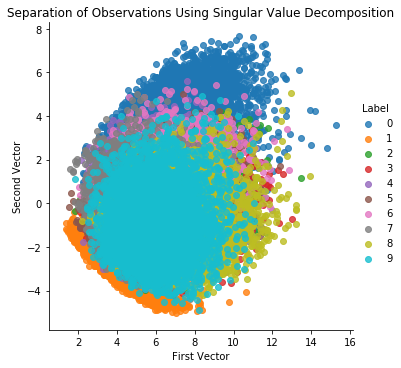

In [10]:
# Sngular Value Decomposition
from sklearn.decomposition import TruncatedSVD
n_components = 200
algorithm = "randomized"
n_iter = 5
random_state = 2018
svd = TruncatedSVD(n_components=n_components, algorithm=algorithm, n_iter=n_iter,
                  random_state = random_state)
X_train_svd = svd.fit_transform(X_train)
X_train_svd = pd.DataFrame(data=X_train_svd, index=train_index)
X_validation_svd = svd.transform(X_validation)
X_validation_svd = pd.DataFrame(data=X_validation_svd, index=validation_index)
scatterPlot(X_train_svd, y_train, "Singular Value Decomposition")

## Random Projection

This is another linear dimensionality reduction technique, which relies on the *Johnson-Lindenstrauss lemma*, according to this study the points in a high-dimensional space can be embedded into a much lower-dimensional space, one of the most important thing is that the revevant structure of the original feature set is preserved.

### Gaussian Random Projection

The standard version of Random Projection is known *Gaussian Random Projection*. For this approach we can specify the number of components we would like to have in the reduced feature space, or we can set the hyperparameter *eps*. The *eps* controls the quality of the embedding according to the *Johnson-Lindenstrauss lemma*, where smaller values generate a higher number of dimensions. 

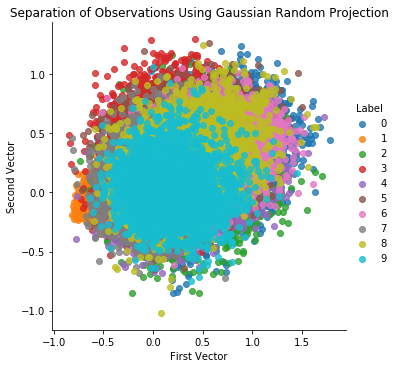

In [12]:
# Gaussian Random Projection

from sklearn.random_projection import GaussianRandomProjection

n_components = "auto"
eps = 0.5
random_state = 2018
GRP = GaussianRandomProjection(n_components=n_components, eps=eps, random_state=random_state)
X_train_GRP = GRP.fit_transform(X_train)
X_train_GRP = pd.DataFrame(data=X_train_GRP, index= train_index)
X_validation_GRP = GRP.transform(X_validation)
X_validation_GRP = pd.DataFrame(data=X_validation_GRP, index=validation_index)
scatterPlot(X_train_GRP, y_train, "Gaussian Random Projection")

### Sparse Random Projection

It retains some degree of sparsity in the transformed feature set and is generally much more efficient, transforming the original data into the reduced space much faster than normal Gaussian random projection.

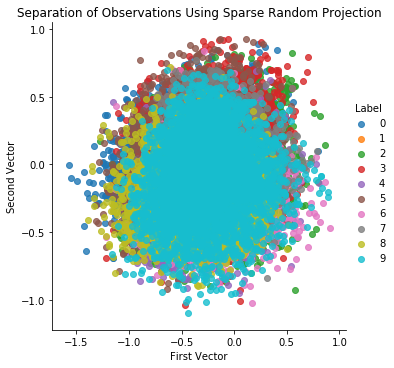

In [16]:
# Sparse Random Projection

from sklearn.random_projection import SparseRandomProjection
n_components = "auto"
density = "auto"
eps = 0.5
dense_output = False
random_state = 2018
SRP = SparseRandomProjection(n_components=n_components, density=density, eps=eps, dense_output=dense_output,
                            random_state=random_state)
X_train_SRP = SRP.fit_transform(X_train)
X_train_SRP = pd.DataFrame(data=X_train_SRP, index=train_index)
X_validation_SRP = SRP.transform(X_validation)
X_validation_SRP = pd.DataFrame(data=X_validation_SRP, index=validation_index)
scatterPlot(X_train_SRP, y_train, "Sparse Random Projection")

### Manifold Learning

It is also referred to as *nonlinear dimensionality reduction*. This involves techniques such as isomap, which learns the curved distance (also called the geodesic distance) between points rather than the Euclidean distance. Other techniques include 
+ multidimensional scaling (MDS)
+ locally linear embedding (LLE)
+ t-distributed stochastic neighbor embedding (t-SNE)
+ dictionary learning
+ random trees embedding
+ independent component analysis.

## Isomap

Instead of linearly projecting the data from high-dimensional space to a low-dimensional space, we can use nonlinear dimensionality reduction methods. All of the methods are known as manifold learning. 

The most normal form of manifold learning is known as *isometric mapping, or isomap*. Likewise PCA, Isomap learns a new, low-dimensional embedding of the original feature set calculating the pairwise distances of all the points, where the distance is *curved or geodesic distance* than *Euclidian distance*

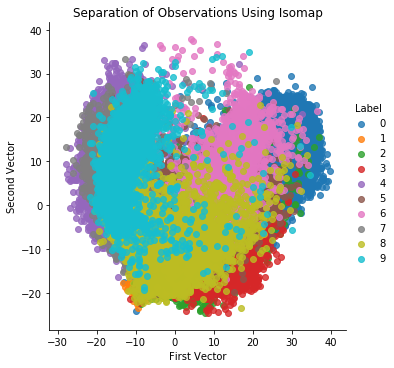

In [9]:
# Isomap
from sklearn.manifold import Isomap

n_neighbors = 5
n_components = 10
n_jobs = 4
isomap = Isomap(n_neighbors=n_neighbors, n_components = n_components, n_jobs=n_jobs)
isomap.fit(X_train.loc[:5000,:])
X_train_isomap = isomap.transform(X_train)
X_train_isomap = pd.DataFrame(data=X_train_isomap, index=train_index)
X_validation_isomap = isomap.transform(X_validation)
X_validation_isomap = pd.DataFrame(data=X_validation_isomap, index=validation_index)
scatterPlot(X_train_isomap, y_train, "Isomap")

## Multidimensional Scaling 

*Multidimensional Scaling (MDS)* is a form of nonlinear dimensionality reduction that learns the similarity of points in the original datasets and, using this similarity learning, it models this in a lower dimensional space

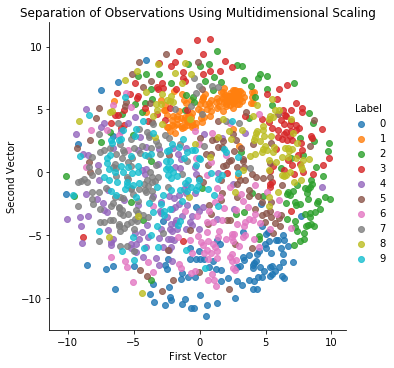

In [12]:
# multidimensional scaling
from sklearn.manifold import MDS
n_components = 2
n_init = 12
max_iter = 1200
metric = True
n_jobs
random_state = 2018
mds = MDS(n_components=n_components, n_init=n_init, max_iter=max_iter, metric=metric, n_jobs=n_jobs, 
          random_state=random_state)
X_train_mds = mds.fit_transform(X_train.loc[:1000,:])
X_train_mds = pd.DataFrame(data=X_train_mds, index=train_index[:1001])
scatterPlot(X_train_mds, y_train, "Multidimensional Scaling")

### Locally Linear Embedding 

It is another popular nonlinear dimensionality reduction technique knows as LEE. This method preserves distances within local neighborhoods as it projects the data from the original feature space to a reduced space. 

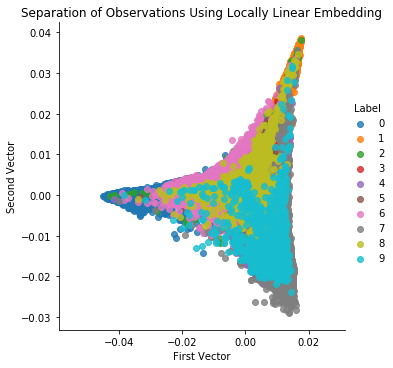

In [13]:
# Locally Linear Embedding
from sklearn.manifold import LocallyLinearEmbedding
n_neighbors = 10
n_components = 2
method = "modified"
n_jobs = 4
random_state = 2018
lle = LocallyLinearEmbedding(n_neighbors=n_neighbors, n_components=n_components, method=method, n_jobs=n_jobs,
                            random_state=random_state)
lle.fit(X_train.loc[:5000,:])
X_train_lle = lle.transform(X_train)
X_train_lle = pd.DataFrame(data=X_train_lle, index=train_index)
X_validation_lle = lle.transform(X_validation)
X_validation_lle = pd.DataFrame(data=X_validation_lle, index=validation_index)
scatterPlot(X_train_lle, y_train, "Locally Linear Embedding")

### T-Distributed Stochastic Neighbor Embedding

*t-distributed stochastic neighbor embedding (t-SNE)* is a nonlinear dimensionality reduction technique for visualization high-dimensional data. It accomplimshes the reduction by modeling each high-dimensional point into a two- or three-dimensional spac, where similar points are modeled close to each other and **dissimilar points are modeled farther away**. This is done by contructing two probability distributions, one over pairs of points in the high-dimensional space and another over pairs of points in the low-dimensional space such that similar points have a high probability and dissimilar points have a lower probability. Specifically, t-SNE minimizes the *Kullback-Leibler divergence (KL)* between two probability distributions.

As suggestion from the book, it is important to evaluate t-SNE against another dimensionality reduction technique (such as PCA). 

*KL* is a non simetric measure to calculate the difference or the similarity of two distribution functions P and Q. 


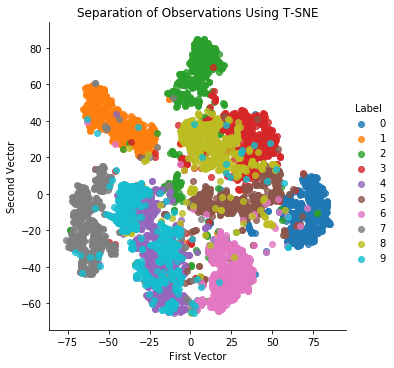

In [19]:
# t-SNE

from sklearn.manifold import TSNE
n_components = 2
learning_rate = 300
perplexity = 30
early_exaggeration = 12
init = "random"
random_state = 2018
tSNE = TSNE(n_components=n_components,learning_rate=learning_rate,perplexity=perplexity, 
            early_exaggeration=early_exaggeration, init=init, random_state=random_state)
X_train_tSNE = tSNE.fit_transform(X_train_PCA.loc[:5000,:9])
X_train_tSNE = pd.DataFrame(data=X_train_tSNE, index=train_index[:5001])
scatterPlot(X_train_tSNE, y_train, "T-SNE")

## Independent Component Analysis
